#**Dispersión de Thomson en el Sol**

Cuando una onda electromagnética incide en un electrón, produce una vibración en dicho electrón que da lugar a una segunda onda con la misma frecuencia, y por tanto, con la misma energía, en otra dirección. Dicha onda, tendrá sin embargo una menor intensidad.

Deben cumplirse **dos condiciones** para que tenga lugar la dispersión de Thomson:

1.   La **longitud de coherencia** de la radiación es pequeña en comparación con la separación entre las partículas.
2.   La **energía de los fotones** es despreciable en comparación con la energía de la masa del resto de partículas.

*T.A. Howard, S.J. Tappin (Interplanetary Coronal Mass Ejections Observed in the Heliosphere: 1. Review of Theory, 27 May 2009)*

Sección eficaz para un electrón: **7.95E-30 m²sr-¹**


***Dispersión de Thomson en la corona solar***: podemos observar el fenómeno de la dispersión de Thomson en la corona del Sol, donde los fotones emitidos desde la fotosfera interaccionan con los electrones libres del plasma de la corona.
En particular, se puede utilizar la información que nos da este fenómeno para estudiar la masa de las eyecciones de masa coronal, EMCs (en inglés, *Coronal Mass Ejections, CMEs*).

##**1. Geometría y fenómeno de la dispersión de Thomson**

### 1.1. Definición de **constantes** y **parámetros iniciales**

Importación de librerías y definición de constantes para la realización de los cálculos:

In [28]:
from math import *
from matplotlib import pyplot
import numpy as np

####**Ley de desplazamiento de Wien**

In [29]:
def ley_wien(onda):
  return 2.8978E-3 / onda

####**Ley de Planck:** radiación de cuerpo negro

En función de la **frecuencia**, $\nu$:
$$I_\nu = \frac{2 h \nu^3}{c^2}\frac{1}{e^{\frac{h \nu}{k T}}-1}$$

En función de la **longitud de onda**, $\lambda$:
$$I_\lambda = \frac{2 h c^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda k T}} - 1}$$
Donde:


* $h = 6.62607015·10^{-34} J·s$ es la constante de Planck.  
* $\nu $ es la frecuencia de la longitud de onda.
* $k = 1.38·10^{-23}J·K^{-1}$ es la constante de Boltzmann.
* $c = 3·10^8m·s^{-1}$ es la velocidad de la luz.
* $T = 5778 K$ es la temperatura (en este caso del Sol).



In [30]:
def radiacion_planck(T, onda, es_long_onda = True):
  '''
  Ley de radiación de Planck para el cuerpo negro. Contempla las dos 
  expresiones, en función de la longitud de onda o en función de la frecuencia
  de la onda.

  Parámetros
  -----------
  T: temperatura efectiva del cuerpo negro.
  onda: longitud de onda en metros.
  es_long_onda: True si el valor del parámetro 'onda' se corresponde con la
  longitud de onda, False si no, y, por tanto, se corresponde con la frecuencia
  de la onda.

  Devuelve
  -----------
  La intensidad de radiancia del cuerpo negro en unidades (SI)
  '''

  h = 6.62607015E-34 # J/s
  c = 3E8 # m/s 
  k = 1.38E-23 # Constante de Boltzmann

  if (es_long_onda):
    # Ley de Planck en función de la longitud de onda.
    i0 = (2 * h * c**2) / (onda**5 * (exp((h * c) / (onda * k * T)) - 1))
  else:
    # Ley de Planck en función de la frecuencia de la onda.
    i0 = (2 * h * onda**3) / (c**2 * (np.exp((h * onda) / (k * T)) - 1))

  return i0


Longitud de onda inicial =  5.e-08
Longitud de onda final =  2.e-06
Paso de longitud de onda =  1.95e-09


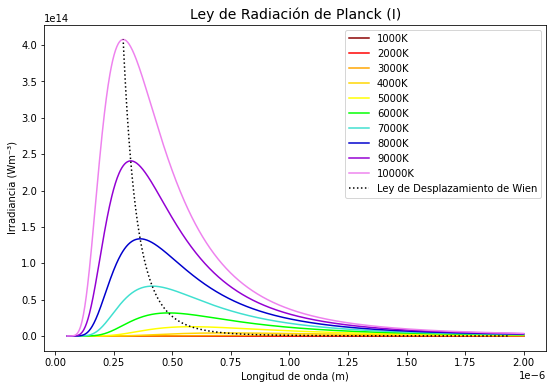

Frecuencia inicial 6.e+15
Frecuencia final =  1.5e+14
Paso para la frecuencia =  5.85e+12


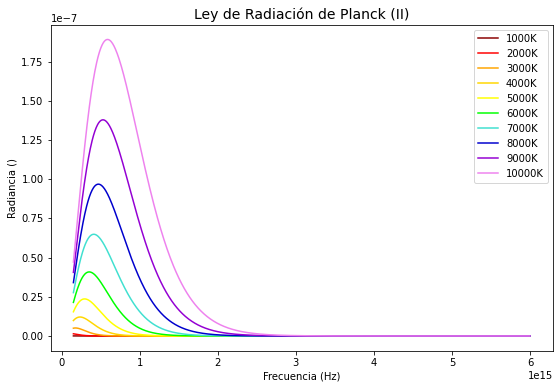

In [31]:
# Valores para la temperatura efectiva del cuerpo negro (K).
temperaturas_planck = range(1000, 11000, 1000)
# Configuración para la visualización de los gráficos: colores de líneas y 
# etiquetas para la leyenda.
colores_planck = ['darkred', 'red', 'orange', 'gold', 'yellow', 'lime', 'turquoise', 'mediumblue', 'darkviolet', 'violet']
etiquetas_planck = [str(i) + "K" for i in temperaturas_planck]

# Gráfico de la ley de radiación de Planck en función de la longitud de onda.

pyplot.figure(figsize=(9, 6))
pyplot.title("Ley de Radiación de Planck (I)", fontsize=14)
pyplot.xlabel("Longitud de onda (m)")
pyplot.ylabel("Irradiancia (Wm⁻³)")

ini_long_onda = 500E-10 # m
print("Longitud de onda inicial = ", np.format_float_scientific(ini_long_onda))

long_onda = 20000E-10 # m 
print("Longitud de onda final = ", np.format_float_scientific(long_onda))

incr_long_onda = abs(long_onda - ini_long_onda) / 1E3 #10E-10# Ángstroms
print("Paso de longitud de onda = ", np.format_float_scientific(incr_long_onda))

valores_long_onda = np.arange(ini_long_onda, long_onda + incr_long_onda, incr_long_onda)

for i in range(len(temperaturas_planck)):
  # Calcula los valores de intensidad recibida en función de z para una elongación fija.
  valores_radiancia = [radiacion_planck(temperaturas_planck[i], j) for j in valores_long_onda]
  # Representa los valores de omega.
  pyplot.plot(valores_long_onda, valores_radiancia, linestyle = '-', color = colores_planck[i], label = etiquetas_planck[i])

# Añadimos Ley de Desplazamiento de Wien
temperaturas_wien = range(1500, 10001)
valores_long_onda_wien = [ley_wien(i) for i in temperaturas_wien]
valores_wien = [radiacion_planck(i, ley_wien(i)) for i in temperaturas_wien]
pyplot.plot(valores_long_onda_wien, valores_wien, linestyle = ':', color = 'k', label = 'Ley de Desplazamiento de Wien')

pyplot.legend()
pyplot.show()

# Gráfico de la ley de radiación de Planck en función de la frecuencia de la 
# onda.

pyplot.figure(figsize=(9, 6))
pyplot.title("Ley de Radiación de Planck (II)", fontsize=14)
pyplot.xlabel("Frecuencia (Hz)")
pyplot.ylabel("Radiancia ()")

c = 3E8

ini_frecuencia = c / ini_long_onda 
print("Frecuencia inicial", np.format_float_scientific(ini_frecuencia))

frecuencia =  c / long_onda
print("Frecuencia final = ", np.format_float_scientific(frecuencia))

incr_frecuencia = abs(frecuencia - ini_frecuencia) / 1E3
print("Paso para la frecuencia = ", np.format_float_scientific(incr_frecuencia))

valores_frecuencia = np.arange(frecuencia, ini_frecuencia + incr_frecuencia, incr_frecuencia)
#valores_frecuencia = valores_frecuencia[::-1]

for i in range(len(temperaturas_planck)):
  # Calcula los valores de intensidad recibida en función de z para una elongación fija.
  valores_radiancia = [radiacion_planck(temperaturas_planck[i], j, False) for j in valores_frecuencia]
  # Representa los valores de omega.
  pyplot.plot(valores_frecuencia, valores_radiancia, linestyle = '-', color = colores_planck[i], label = etiquetas_planck[i])

pyplot.legend()
pyplot.show()

In [32]:
l = long_onda
nu = frecuencia
print("long_onda:", np.format_float_scientific(l), "-->", np.format_float_scientific(c / l))
print("frecuencia: ", np.format_float_scientific(nu), "-->", np.format_float_scientific(c / nu))

long_onda: 2.e-06 --> 1.5e+14
frecuencia:  1.5e+14 --> 2.e-06


#####Gráfico de la radiación de cuerpo negro del Sol

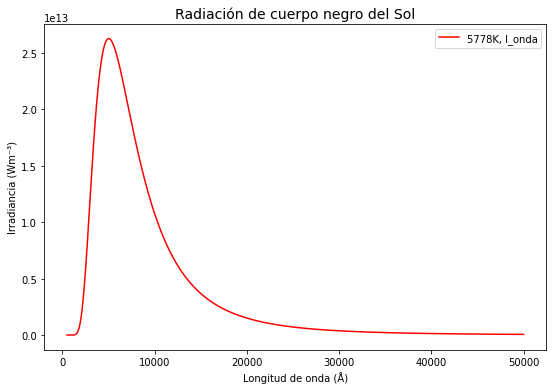

In [33]:
# Gráfico de la ley de radiación de Planck en función de la longitud de onda 
# para el Sol.

pyplot.figure(figsize=(9, 6))
pyplot.title("Radiación de cuerpo negro del Sol", fontsize=14)
pyplot.xlabel("Longitud de onda (Å)")
pyplot.ylabel("Irradiancia (Wm⁻³)")

T_SOL = 5778
long_onda = 50000E-10 # m 
incr_long_onda = 10E-10# m
ini_long_onda = 500E-10 # m
valores_long_onda = np.arange(ini_long_onda, long_onda + incr_long_onda, incr_long_onda)

c = 3E8

ini_frecuencia = c / ini_long_onda 
frecuencia =  c / long_onda
incr_frecuencia = abs(frecuencia - ini_frecuencia) / 1E3
valores_frecuencia = np.arange(frecuencia, ini_frecuencia + incr_frecuencia, incr_frecuencia)


# Calcula los valores de intensidad recibida en función de z para una elongación fija.
valores_planck_long_onda = [radiacion_planck(T_SOL, i) for i in valores_long_onda]
valores_planck_frec = [radiacion_planck(T_SOL, i, False) for i in valores_frecuencia]

# Representa los valores de omega.
pyplot.plot([i * 1E10 for i in valores_long_onda], valores_planck_long_onda, linestyle = '-', color = 'r', label = str(T_SOL) + "K, l_onda")
#pyplot.plot([c / i for i in valores_frecuencia], valores_planck_frec, linestyle = '-', color = 'b', label = str(T_SOL) + "K, frec")

pyplot.legend()
pyplot.show()


####Función de limb-darkening

In [34]:
def allen_clv(wave,theta,check = 0):

    """
    Allen's Astrophysical Quantities, Springer, 2000 
    get u(lambda) from Allen tables. I(theta)/I{(O)
    theta = angle between the Sun's radius vector and the line of sight. In rad.
    wave = wavelength in Angstroms
    forth parameter is u!!!!!
    """

    def coefs(wave):
        u = (- 8.9829751 + 0.0069093916*wave - 1.8144591e-6*wave**2 + 2.2540875e-10*wave**3 -
            1.3389747e-14*wave**4 + 3.0453572e-19*wave**5 )
        v = (+ 9.2891180 - 0.0062212632*wave + 1.5788029e-6*wave**2 - 1.9359644e-10*wave**3 + 
            1.1444469e-14*wave**4 - 2.5994940e-19*wave**5 )
        return u,v

    try:
        if check == 1:
            gamma = np.arange(0,90,1)*np.pi/180.
            u,v = coefs(wave) 
            I = 1 - (u+v) + (u+v)*np.cos(gamma)
            clv = 1 - u - v + u*np.cos(gamma)+v*np.cos(gamma)
            plt.plot(gamma,clv)
            plt.plot(gamma,I,'--')
    except:
        pass
    u,v = coefs(wave) 
    if check == 2:
        return u + v
    return 1 - u - v + u*np.cos(theta)+v*np.cos(theta),u,v,u + v

print(allen_clv(12000, 1, 2))

def coef_limb_darkening(onda, unidades = 1E+10):
  '''
  Adaptación de la función allen_clv al parámetro necesario para la dispersión
  de Thomson, el coeficiente de limb-darkening (u).

  Parámetros
  -------------
  onda: longitud de onda en metros (m).
  unidades: factor de conversión necesario para que la longitud de onda se
  transforme a Ángstroms. Por defecto asume que el parámetro onda
  se da en unidades SI y, por tanto, multiplica por el factor 1E+10 para obtener
  Ángstroms.

  Véase
  ----------
  allen_clv: función basada en las tablas de Allen (Astrophysical Quantities, 
  Springer 2000) de SPG (IAA - CSIC).

  Devuelve
  ----------
  El coeficiente de limb-darkening (u).
  '''
  onda = onda * unidades
  return allen_clv(onda, 1, 2)

print(coef_limb_darkening(12000E-10))

0.3580811502399399
0.3580811502399399


#### Constantes y parámetros iniciales

In [35]:
# Constantes 
RSOL_DEFAULT = 696340000 # 1 Radio solar (m).
SIGMAe_DEFAULT = 7.95E-30 # sección eficaz de un electrón, e, (m²sr⁻¹)
ONDA_DEFAULT= 5000E-10 # Longitud de onda en estudio, en metros (5000A)
T_DEFAULT = 5778 # K
X_DEFAULT = 215 # RSol, distancia entre la Tierra y el Sol (O-S).
EPSILON_DEFAULT = (radians(10)) # rad, configuración inicial de la elongación 
                        # para el modelo de la K-Corona.

In [36]:
# Constantes 
RSOL = RSOL_DEFAULT
SIGMAe = SIGMAe_DEFAULT
ONDA = ONDA_DEFAULT
T = T_DEFAULT
I0 = radiacion_planck(T_DEFAULT, ONDA_DEFAULT) # intensidad de la fuente (el Sol)
U = coef_limb_darkening(ONDA_DEFAULT) # coeficiente de limb - darkening.
X = X_DEFAULT
EPSILON = EPSILON_DEFAULT

### 1.2. Funciones auxiliares ligadas a la geometría de la dispersión de Thomson

In [37]:
# Primera parte: para un solo electrón.

def faux_omega_d(d, r = 1):
  '''
  Devuelve un valor para el ángulo omega (T-Q-S) en radianes (rad) en función de
  la distancia, d, del centro de la estrella, S, al punto de dispersión, Q.

  En el caso de que se emplee el radio estelar como unidad, por defecto, r = 1.
  
  Función auxiliar de la geometría de la dispersión de Thomson.

  Parámetros
  ----------
  d: distancia entre el centro de la estrella, S, y el punto de dispersión, Q.
  r: radio de la estrella. 

  Devuelve
  ----------
  Valor del ángulo omega en radianes (rad).
  '''

  return asin(r / d)

def faux_z_intensidad(x, d, chi):
  '''
  Devuelve el valor de la distancia, z, del observador, O, al punto de 
  dispersión, Q, en función del ángulo de dispersión (S-Q-O) y de la distancia, 
  d, del punto de dispersión (Q) al centro de la estrella (S).

  Función auxiliar de la geometría de la dispersión de Thomson.

  Parámetros
  ----------
  x: distancia del observador (O) al centro de la estrella (S).
  d: distancia del punto de dispersión (Q) al centro de la estrella (S).
  chi: ángulo de dispersión (S-Q-O) en radianes (rad).

  Devuelve
  ----------
  Valor de la distancia, z, del observador, O, al centro de la estrella, S.
  '''

  return d * cos(chi) + sqrt(pow(d, 2) * (pow(cos(chi), 2) - 1) + pow(x, 2))

# Segunda parte: a través de la línea del observador.

def faux_d(x, z, epsilon):
  '''
  Devuelve un valor para la distancia, d, entre el Sol, S, y el punto de
  dispersión, Q, en función de la distancia, z, desde el observador, O, y el
  punto de dispersión, Q, y del ángulo de la elongación, epsilon.

  Función auxiliar de la geometría de la dispersión de Thomson.

  Parámetros
  ----------
  x: distancia del observador (O) al centro de la estrella (S).
  z: distancia entre el observador, O, y el punto de dispersión, Q.
  epsilon: ángulo de la elongación (S-Q-O) en radianes (rad).

  Devuelve
  ----------
  Valor de la distancia, d.
  '''

  return pow(pow(x, 2) + pow(z, 2) - 2 * x * z * cos(epsilon), 0.5)

def faux_omega(x, z, epsilon, r = 1):
  '''
  Devuelve un valor para el ángulo omega (T-Q-S) en radianes (rad) en función de
  la distancia, z, del observador, O, al punto de dispersión, Q, y del ángulo de
  la elongación, epsilon.

  En el caso de que se emplee el radio estelar como unidad, por defecto, r = 1.

  Función auxiliar de la geometría de la dispersión de Thomson.

  Parámetros
  ----------
  x: distancia del observador (O) al centro de la estrella (S).
  z: distancia entre el observador, O, y el punto de dispersión, Q.
  epsilon: ángulo de la elongación (S-Q-O) en radianes (rad).
  r: radio de la estrella.

  Devuelve
  ----------
  Valor del ángulo omega en radianes (rad).

  Véase
  ----------
  faux_d: función auxiliar que obtiene la distancia d en función de 
  la distancia z y el ángulo epsilon.
  faux_omega_d: función auxiliar que obtiene el ángulo omega en función de la
  distancia d.
  '''

  return faux_omega_d(faux_d(x, z, epsilon), r)

def faux_z(x, epsilon, phi):
  '''
  Devuelve el valor de la distancia, z, del observador, O, al punto de 
  dispersión, Q, en función del ángulo de la elongación (Q-O-S), epsilon, y del
  ángulo phi (O-S-Q).

  Función auxiliar de la geometría de la dispersión de Thomson.

  Parámetros
  ----------
  x: distancia del observador (O) al centro de la estrella (S).
  epsilon: ángulo de la elongación (Q-O-S) en radianes (rad).
  phi: ángulo O-S-Q en radianes (rad).

  Devuelve
  ----------
  Valor de la distancia, z, del observador, O, al centro del Sol, S, en radios
  solares (Rsol).
  '''

  return (x * tan(phi)) / (sin(epsilon) + tan(phi) * cos(epsilon))


## **2. Dispersión de Thomson para un único electrón**

###2.1. Obtención de los **coeficientes de van de Hulst**

Coeficiente **A** de van de Hulst:

In [38]:
def vanDeHulstA(omega):
  '''
  Coeficiente A de van de Hulst en función del ángulo omega.

  Parámetros
  -----------
  omega: ángulo T-Q-S en radianes (rad).

  Devuelve
  ---------
  Valor del coeficiente A de van de Hulst.
  '''

  return cos(omega) * pow(sin(omega), 2)

Coeficiente **B** de van de Hulst:

In [39]:
def vanDeHulstB(omega):
  '''
  Coeficiente B de van de Hulst en función del ángulo omega.

  Parámetros
  -----------
  omega: ángulo T-Q-S en radianes (rad).

  Devuelve
  ---------
  Valor del coeficiente B de van de Hulst.
  '''

  return -1 / 8 * (1 - 3 * pow(sin(omega), 2) - (pow(cos(omega), 2) / sin(omega)
   * (1 + 3 * pow(sin(omega), 2)) * log((1 + sin(omega)) / cos(omega))))

Coeficiente **C** de van de Hulst

In [40]:
def vanDeHulstC(omega):
  '''
  Coeficiente C de van de Hulst en función del ángulo omega.

  Parámetros
  -----------
  omega: ángulo T-Q-S en radianes (rad).

  Devuelve
  ---------
  Valor del coeficiente C de van de Hulst.
  '''

  return 4 / 3 - cos(omega) - pow(cos(omega), 3) / 3

Coeficiente **D** de van de Hulst:

In [41]:
def vanDeHulstD(omega):
  '''
  Coeficiente D de van de Hulst en función del ángulo omega.

  Parámetros
  -----------
  omega: ángulo T-Q-S en radianes (rad).

  Devuelve
  ---------
  Valor del coeficiente D de van de Hulst.
  '''

  return 1 / 8 * (5 + pow(sin(omega), 2) - (pow(cos(omega), 2) / sin(omega)) * 
                  (5 - pow(sin(omega), 2)) * log((1 + sin(omega)) / cos(omega)))

####Gráfico de los **Coeficientes de van de Hulst**
Representación de los coeficentes de van de Hulst en función de la distancia, d (Rsol) del punto de dispersión, Q, al centro del Sol, S.

In [42]:
def vanDeHulst(omega, coeficiente):
  '''
  Dado un valor para el ángulo omega, y el nombre de uno de los coeficientes
  de van de Hulst, devuelve su valor. Acepta el nombre tanto en minúsculas como
  en mayúsculas.

  Parámetros
  -----------
  omega: ángulo S-Q-T en radianes (rad).
  coeficiente: nombre del coeficiente de van de Hulst pedido.

  Devuelve
  ---------
  Valor del coeficiente de van de Hulst pasado como atributo.
  '''

  coeficiente = coeficiente.upper()

  # Coeficientes de van de Hulst en función del ángulo omega (T-Q-S).
  valorCoeficiente = -1
  if coeficiente == 'A':
    # Coeficiente A.
    valorCoeficiente = vanDeHulstA(omega)
  elif coeficiente == 'B':
    # Coeficiente B.
    valorCoeficiente = vanDeHulstB(omega)
  elif coeficiente == 'C':
    # Coeficiente C.
    valorCoeficiente = vanDeHulstC(omega)
  elif coeficiente == 'D':
    # Coeficiente D.
    valorCoeficiente = vanDeHulstD(omega)
  else:
    # Notifica al usuario de que ha introducido un nombre no válido para los
    # coeficientes de van de Hulst.
    print("[vanDeHulstDistanciaSol_ERR]::Coeficiente no válido.")
  return valorCoeficiente

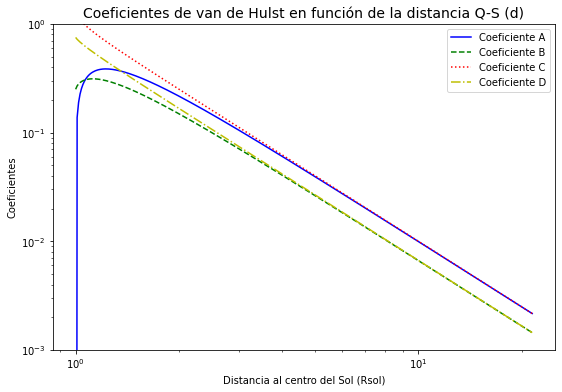

In [43]:
# Gráfico de los coeficientes de van de Hulst en función de la distancia del 
# punto de dispersión, Q, al centro del Sol, S.

pyplot.figure(figsize=(9, 6))
pyplot.title("Coeficientes de van de Hulst en función de la distancia Q-S (d)",fontsize=14)
pyplot.xlabel("Distancia al centro del Sol (Rsol)")
pyplot.ylabel("Coeficientes")

valores_d = np.arange(1, 21.49, 0.01) # RSol

# Cálculo del valor de los coeficientes, d(m), S.I.
pyplot.plot(valores_d, [vanDeHulst(faux_omega_d(d), 'A') for d in valores_d], linestyle='-', color='b', label = "Coeficiente A")
pyplot.plot(valores_d, [vanDeHulst(faux_omega_d(d), 'B') for d in valores_d], linestyle='--', color='g', label = "Coeficiente B")
pyplot.plot(valores_d, [vanDeHulst(faux_omega_d(d), 'C') for d in valores_d], linestyle=':', color='r', label = "Coeficiente C")
pyplot.plot(valores_d, [vanDeHulst(faux_omega_d(d), 'D') for d in valores_d], linestyle='-.', color='y', label = "Coeficiente D")


pyplot.ylim(0.001, 1)
pyplot.xscale("log")
pyplot.yscale("log")

pyplot.legend()
pyplot.show()

### 2.2. Obtención de las **intensidades**

Intensidad **polarizada** (**Ip**)

In [44]:
def Ip(i0, sigma_e, z, omega, chi, u):
  '''
  Dada una intensidad inicial, I0, la sección eficaz del electrón, sigma_e, la 
  distancia, z, del observador, O, al punto de dispersión, Q, el ángulo omega 
  (T-Q-S), el ángulo chi (S-Q-O) y el coeficiente de limb-darkening, u, devuelve
  la intensidad polarizada.

  Parámetros
  -----------
  i0: intensidad inicial en [ver unidades].
  sigma_e: sección eficaz del electrón (m²sr-¹).
  z: distancia del observador, O, al punto de dispersión Q.
  omega: ángulo T-Q-S en radianes (rad).
  chi: ángulo de dispersión (S-Q-O) en radianes (rad).
  u: coeficiente de limb-darkening en [0, 1].

  Devuelve
  ---------
  Valor de la intensidad polarizada.
  '''
  return i0 * (pi * sigma_e) / (2 * pow(z, 2)) * pow(sin(chi), 2) * ((1 - u) 
  * vanDeHulst(omega, 'A') + u * vanDeHulst(omega, 'B'))

Intensidad **tangencial** (**It**)

In [45]:
def It(i0, sigma_e, z, omega, u):
  '''
  Dada una intensidad inicial, I0, la sección eficaz del electrón, sigma_e, la 
  distancia, z, del observador, O, al punto de dispersión, Q, el ángulo 
  omega (T-Q-S) y el coeficiente de limb-darkening, u, devuelve la intensidad 
  tangencial.

  Parámetros
  -----------
  i0: intensidad inicial en [ver unidades].
  sigma_e: sección eficaz del electrón (m²sr-¹).
  z: distancia del observador, O, al punto de dispersión Q.
  omega: ángulo T-Q-S en radianes (rad).
  u: coeficiente de limb-darkening en [0, 1].

  Devuelve
  ---------
  Valor de la intensidad tangencial.
  '''

  return i0 * (pi * sigma_e) / (2 * pow(z, 2)) * ((1 - u) 
  * vanDeHulst(omega, 'C') + u * vanDeHulst(omega, 'D'))

Intensidad **radial** (**Ir**)

In [46]:
def Ir(i0, sigma_e, z, omega, chi, u):
  '''
  Dada una intensidad inicial, i0, la sección eficaz del electrón, sigma_e, la 
  distancia, z, del observador, O, al punto de dispersión, Q, el ángulo omega 
  (T-Q-S), el ángulo chi (S-Q-O) y el coeficiente de limb-darkening, u, devuelve
  la intensidad radial.

  Parámetros
  -----------
  i0: intensidad inicial en [ver unidades].
  sigma_e: sección eficaz del electrón (m²sr-¹).
  z: distancia del observador, O, al punto de dispersión Q.
  omega: ángulo T-Q-S en radianes (rad).
  chi: ángulo de dispersión (S-Q-O) en radianes (rad).
  u: coeficiente de limb-darkening en [0, 1].

  Devuelve
  ---------
  Valor de la intensidad radial.
  '''
  return It(i0, sigma_e, z, omega, u) - Ip(i0, sigma_e, z, omega, chi, u)

Intensidad **total** (**Itotal**)

In [47]:
def Itotal(i0, sigma_e, z, omega, chi, u):
  '''
  Dada una intensidad inicial, i0, la sección eficaz del electrón, sigma_e, la 
  distancia, z, del observador, O, al punto de dispersión, Q, el ángulo omega 
  (T-Q-S), el ángulo chi (S-Q-O) y el coeficiente de limb-darkening, u, devuelve
  la intensidad radial.

  En base a las intensidades tangencial y polarizada calcula la intensidad total
  dispersada.

  Parámetros
  -----------
  i0: intensidad inicial en [ver unidades].
  sigma_e: sección eficaz del electrón (m²sr-¹).
  z: distancia del observador, O, al punto de dispersión Q.
  omega: ángulo T-Q-S en radianes (rad).
  chi: ángulo de dispersión (S-Q-O) en radianes (rad).
  u: coeficiente de limb-darkening en [0, 1].

  Devuelve
  ---------
  Valor de la intensidad total.

  Véase
  ---------
  It: función de la intensidad tangencial.
  Ip: función de la intensidad polarizada.
'''
  return 2 * It(i0, sigma_e, z, omega, u) - Ip(i0, sigma_e, z, omega, chi, u)

####Gráfico de la **evolución de z con el ángulo CHI** para d y x fijas.

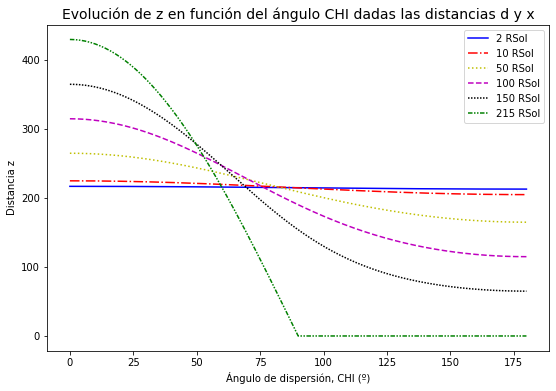

In [48]:
pyplot.figure(figsize=(9, 6))
pyplot.title("Evolución de z en función del ángulo CHI dadas las distancias d y x",fontsize=14)
pyplot.xlabel("Ángulo de dispersión, CHI (º)")
pyplot.ylabel("Distancia z")

valores_chi = [radians(i) for i in range(0, 181)]
valores_chi_grados = range (0, 181)

x = X # Rsol
d = [2, 10, 50, 100, 150, 215] # Rsol

estilos = ['-', '-.', ':', '--', (0, (1, 1)), (0, (3, 1, 1, 1, 1, 1))]
colores = ['b', 'r', 'y', 'm', 'k', 'g']
etiquetas = [str(i) + " RSol" for i in d]

for k in range(len(d)):
  pyplot.plot(valores_chi_grados, [faux_z_intensidad(x, d[k], i) for i in valores_chi], 
              linestyle = estilos[k], color = colores[k], label = etiquetas[k])

pyplot.legend()
pyplot.show()

####**Gráficos** de intensidad

#####Gráfico de la **dispersión de Thomson** a **1 UA** del centro del Sol

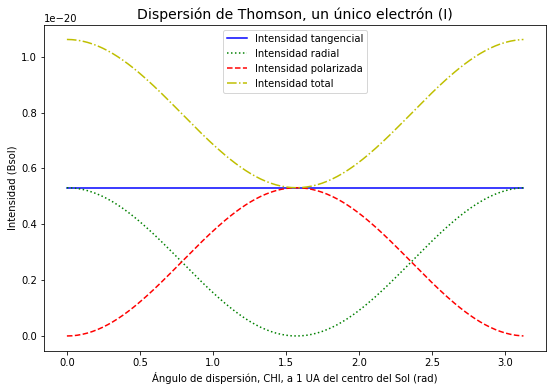

In [49]:
# Gráfico de la dispersión de Thomson a 1 UA del centro del Sol de las 
# intensidades total, tangenicial, radial y polarizada en función del 
# ángulo de dispersión, chi (S-Q-O).

pyplot.figure(figsize=(9, 6))
pyplot.title("Dispersión de Thomson, un único electrón (I)",fontsize=14)
pyplot.xlabel("Ángulo de dispersión, CHI, a 1 UA del centro del Sol (rad)")
pyplot.ylabel("Intensidad (Bsol)")

'''
d = 215 * RSOL # m
x = X * RSOL # m
omega = faux_omega_d(d) # rad
valores_chi = [radians(i) for i in range(0, 89)]

pyplot.plot(valores_chi, [It(I0, SIGMAe, faux_z_intensidad(x, d, i), omega, U) for i in valores_chi], linestyle='-', color='b', label = "Intensidad tangencial")
pyplot.plot(valores_chi, [Ir(I0, SIGMAe, faux_z_intensidad(x, d, i), omega, i, U) for i in valores_chi], linestyle=':', color='g', label = "Intensidad radial")
pyplot.plot(valores_chi, [Ip(I0, SIGMAe, faux_z_intensidad(x, d, i), omega, i, U) for i in valores_chi], linestyle='--', color='r', label = "Intensidad polarizada")
pyplot.plot(valores_chi, [Itotal(I0, SIGMAe, faux_z_intensidad(x, d, i), omega, i, U) for i in valores_chi], linestyle='-.', color='y', label = "Intensidad total")
'''

d = 215 # RSol
omega = faux_omega_d(d) # rad
valores_chi = [radians(i) for i in range(0, 180)]

pyplot.plot(valores_chi, [It(I0, SIGMAe, 1, omega, U) for i in valores_chi], linestyle='-', color='b', label = "Intensidad tangencial")
pyplot.plot(valores_chi, [Ir(I0, SIGMAe, 1, omega, i, U) for i in valores_chi], linestyle=':', color='g', label = "Intensidad radial")
pyplot.plot(valores_chi, [Ip(I0, SIGMAe, 1, omega, i, U) for i in valores_chi], linestyle='--', color='r', label = "Intensidad polarizada")
pyplot.plot(valores_chi, [Itotal(I0, SIGMAe, 1, omega, i, U) for i in valores_chi], linestyle='-.', color='y', label = "Intensidad total")


pyplot.legend()
pyplot.show()


#####Gráfico de la **dispersión de Thomson** a **2 Rsol** del centro del Sol

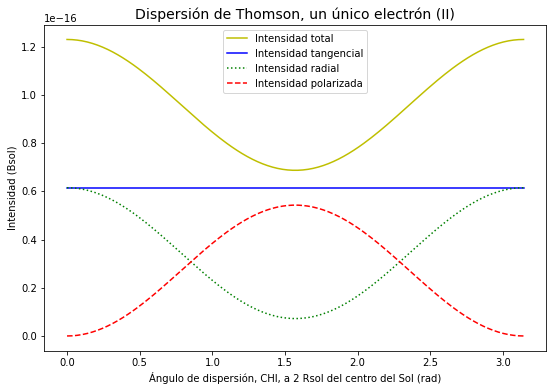

In [50]:
# Gráfico de la dispersión de Thomson a 2 Rsol del centro del Sol de las 
# intensidades total, tangenicial, radial y polarizada en función del 
# ángulo de dispersión, CHI.

pyplot.figure(figsize=(9, 6))
pyplot.title("Dispersión de Thomson, un único electrón (II)",fontsize=14)
pyplot.xlabel("Ángulo de dispersión, CHI, a 2 Rsol del centro del Sol (rad)")
pyplot.ylabel("Intensidad (Bsol)")

x = X # RSol
d = 2 # RSol
omega = faux_omega_d(d) # rad
valores_chi = [radians(i) for i in range(0, 181)]

'''
pyplot.plot(valores_chi, [Itotal(I0, SIGMAe, faux_z_intensidad(x, d, i), omega, i, U) for i in valores_chi], linestyle='-', color='y', label = "Intensidad total")
pyplot.plot(valores_chi, [It(I0, SIGMAe, faux_z_intensidad(x, d, i), omega, U) for i in valores_chi], linestyle='-', color='b', label = "Intensidad tangencial")
pyplot.plot(valores_chi, [Ir(I0, SIGMAe, faux_z_intensidad(x, d, i), omega, i, U) for i in valores_chi], linestyle=':', color='g', label = "Intensidad radial")
pyplot.plot(valores_chi, [Ip(I0, SIGMAe, faux_z_intensidad(x, d, i), omega, i, U) for i in valores_chi], linestyle='--', color='r', label = "Intensidad polarizada")
'''

pyplot.plot(valores_chi, [Itotal(I0, SIGMAe, 1, omega, i, U) for i in valores_chi], linestyle='-', color='y', label = "Intensidad total")
pyplot.plot(valores_chi, [It(I0, SIGMAe, 1, omega, U) for i in valores_chi], linestyle='-', color='b', label = "Intensidad tangencial")
pyplot.plot(valores_chi, [Ir(I0, SIGMAe, 1, omega, i, U) for i in valores_chi], linestyle=':', color='g', label = "Intensidad radial")
pyplot.plot(valores_chi, [Ip(I0, SIGMAe, 1, omega, i, U) for i in valores_chi], linestyle='--', color='r', label = "Intensidad polarizada")


pyplot.legend()
pyplot.show()


## **3. Dispersión de Thomson a través de la línea de visión del observador**

###3.1. Estudio de la evolución de los parámetros necesarios para el cálculo de la dispersión de Thomson

Se definen cuatro listas:


1. ```epsilons```: contiene las distintas elongaciones para las cuales se va a observar la evolución de los parámetros en estudio (d, z, phi, etc.).
2. ```estilos```: contiene los diferentes formatos para las líneas de los gráficos para cada una de las elongaciones.
3. ```colores```: contiene los diferentes colores para las líneas de los gráficos para cada una de las elongaciones.
4. ```etiquetas```: contiene las diferentes etiquetas de las leyendas de los gráficos para cada una de las elongaciones.

La primera hace referencia a los experimentos a realizar sobre los parámetros necesarios para el cálculo de la dispersión de Thomson y la segunda, al formato de los gráficos en os que se representa esa experimentación.



In [51]:
# Valores en radianes para las distintas elongaciones a experimentar.
epsilons = [  radians(5),     radians(20),      radians(30),        radians(45),        radians(60),        radians(90),      radians(135)] 

# Configuración para la visualización de los gráficos: estilos y colores de 
# líneas y etiquetas para la leyenda.
estilos = [       ':',              '-',              '--',              '-.',          (0, (1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 10))]
colores = [       'm',              'b',              'g',               'r',            'orange',         'brown',            'y']
etiquetas = ['Elongación 5º', "Elongación 20º", "Elongación 30º", "Elongación 45º", "Elongación 60º", "Elongación 90º", "Elongación 135º"]

####Gráfico de la **evolución de z en función del ángulo phi** (O-S-Q)

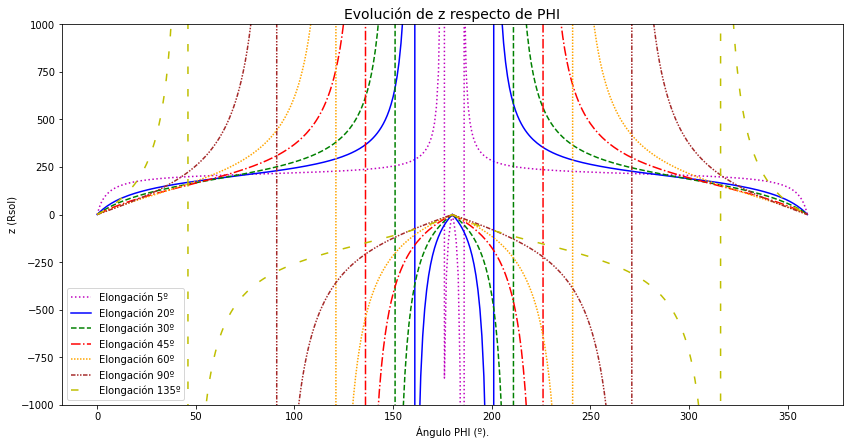

In [52]:
# Gráfico de la evolución de la distancia del observador al punto de dispersión,
# z (Rsol), al punto de dispersión, Q, en función del ángulo phi, O-S-Q.

pyplot.figure(figsize=(14, 7))
pyplot.title("Evolución de z respecto de PHI", fontsize=14)
pyplot.xlabel("Ángulo PHI (º).")
pyplot.ylabel("z (Rsol)")

PHI_360 = radians(360)
PHI_180 = radians(180)
incrPHI = radians(1)
valores_PHI_180 = np.arange(0, PHI_180 + incrPHI, incrPHI)
valores_PHI_360 = np.arange(PHI_180, PHI_360 + incrPHI, incrPHI)

x = X # RSol

# Calcula los valores de la de intensidad recibida en función de z para una 
# elongación fija, epsilon.
for j in range(0, len(epsilons)):
  valores_z_180 = [faux_z(x, epsilons[j], i) for i in valores_PHI_180]
  valores_z_360 = [faux_z(x, epsilons[j], radians(360) - i) for i in valores_PHI_360]
  # Representa los valores de z (Rsol).
  pyplot.plot([degrees(i) for i in valores_PHI_180], valores_z_180, linestyle = estilos[j], color = colores[j], label = etiquetas[j])
  pyplot.plot([degrees(i) for i in valores_PHI_360], valores_z_360, linestyle = estilos[j], color = colores[j])

pyplot.ylim(-1000, 1000)

pyplot.legend()
pyplot.show()

####Gráfico de la **evolución de omega (T-Q-S) en función de la distancia z**

Para la elongación EPSILON = 5.0 º OMEGA tiene máximo en x = 214.18 Rsol donde OMEGA = 3.06 º
Para la elongación EPSILON = 20.0 º OMEGA tiene máximo en x = 202.03 Rsol donde OMEGA = 0.78 º
Para la elongación EPSILON = 30.0 º OMEGA tiene máximo en x = 186.2 Rsol donde OMEGA = 0.53 º
Para la elongación EPSILON = 45.0 º OMEGA tiene máximo en x = 152.03 Rsol donde OMEGA = 0.38 º
Para la elongación EPSILON = 60.0 º OMEGA tiene máximo en x = 107.5 Rsol donde OMEGA = 0.31 º
Para la elongación EPSILON = 90.0 º OMEGA tiene máximo en x = 0.0 Rsol donde OMEGA = 0.27 º
Para la elongación EPSILON = 135.0 º OMEGA tiene máximo en x = 0.0 Rsol donde OMEGA = 0.27 º


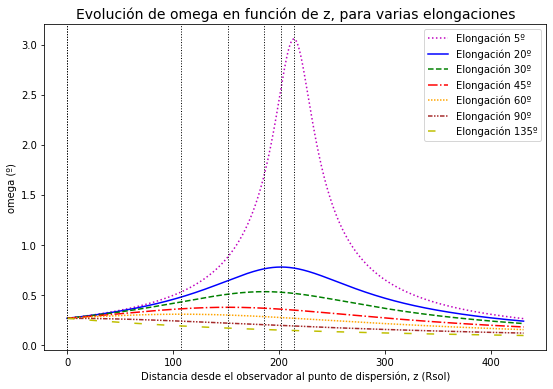

In [53]:
# Gráfico de la evolución de omega, dado una elongación fija, epsilon, en 
# función de la distancia del observador al punto de dispersión, z (Rsol).

pyplot.figure(figsize=(9, 6))
pyplot.title("Evolución de omega en función de z, para varias elongaciones",fontsize=14)
pyplot.xlabel("Distancia desde el observador al punto de dispersión, z (Rsol)")
pyplot.ylabel("omega (º)")

valores_z = np.arange(0, 431, 0.01) #RSol
x = X # Rsol

for j in range(0, len(epsilons)):
  # Calcula los valores de omega en función de z para una elongación fija.
  valores_omega = [faux_omega(x, i, epsilons[j]) for i in valores_z]

  # Calcula el máximo y su coordenada x.
  maxOmega = max(valores_omega)
  zmax = valores_z[valores_omega.index(maxOmega)]

  # Representa los valores de omega.
  pyplot.plot(valores_z, [degrees(i) for i in valores_omega], linestyle = estilos[j], color = colores[j], label = etiquetas[j])

  # Representa el máximo de los valores de omega representados.
  pyplot.axvline(zmax, ymin = 0, ymax = 1, linewidth = 1, linestyle = ':', color = 'k')
  print("Para la elongación EPSILON =", round(degrees(epsilons[j]), 2),
        "º OMEGA tiene máximo en x =", round(zmax, 2), 
        "Rsol donde OMEGA =", round(degrees(maxOmega), 2), "º")

pyplot.legend()
pyplot.show()

####Gráfico de la **evolución de la distancia d en función de la distancia z**

Para la elongación EPSILON = 5.0 º d tiene mínimo en x = 214.18 Rsol donde d = 1073.64 Rsol
Para la elongación EPSILON = 20.0 º d tiene mínimo en x = 202.03 Rsol donde d = 4213.21 Rsol
Para la elongación EPSILON = 30.0 º d tiene mínimo en x = 186.2 Rsol donde d = 6159.3 Rsol
Para la elongación EPSILON = 45.0 º d tiene mínimo en x = 152.03 Rsol donde d = 8710.56 Rsol
Para la elongación EPSILON = 60.0 º d tiene mínimo en x = 107.5 Rsol donde d = 10668.21 Rsol
Para la elongación EPSILON = 90.0 º d tiene mínimo en x = 1.0 Rsol donde d = 12318.73 Rsol
Para la elongación EPSILON = 135.0 º d tiene mínimo en x = 1.0 Rsol donde d = 12359.17 Rsol


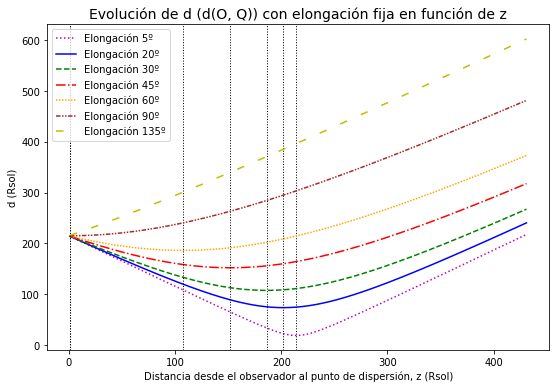

In [54]:
# Gráfico de la evolución de d (distancia desde el punto de dispersión, Q, al 
# Sol), dado un EPSILON fijo, en función de la distancia del observador al punto
# de dispersión.

pyplot.figure(figsize=(9, 6))
pyplot.title("Evolución de d (d(O, Q)) con elongación fija en función de z",fontsize=14)
pyplot.xlabel("Distancia desde el observador al punto de dispersión, z (Rsol)")
pyplot.ylabel("d (Rsol)")

valores_z = np.arange(1, 431, 0.01)
x = X #RSol

for j in range(0, len(epsilons)):
  # Calcula los valores de omega en función de z para una elongación fija.
  valores_d = [faux_d(x, i, epsilons[j]) for i in valores_z]
  # Calcula el máximo y su coordenada x.
  minD = min(valores_d)
  zmin = valores_z[valores_d.index(minD)]
  # Representa los valores de omega.
  pyplot.plot(valores_z, valores_d, linestyle = estilos[j], color = colores[j], label = etiquetas[j])
  # Representa el máximo de los valores de omega representados.
  pyplot.axvline(zmin, ymin = 0, ymax = 1, linewidth = 1, linestyle = ':', color = 'k')
  print("Para la elongación EPSILON =", round(degrees(epsilons[j]), 2), "º d tiene mínimo en x =", round(zmin, 2), "Rsol donde d =", round(degrees(minD), 2), "Rsol")

pyplot.legend()
pyplot.show()

### **3.2. Integración numérica**

####Funciones **necesarias para la integración** en la línea de visión

#####**Expresiones de la dispersión**
Simplificadas para la integración numérica.

In [55]:
def Gt(omega, u, z = 1):
  '''
  Expresión de la dispersión de Thomson para la intensidad tangencial.

  Parámetros
  -----------
  omega: ángulo T-Q-S
  z: distancia del observador (O) al punto de dispersión (Q). Asigna z = 1 por
  defecto para la simplificación de cálculos en la integración numérica de la 
  dispersión a lo largo de la línea de visión.

  Devuelve
  -----------
  Valor de la dispersión tangencial.
  '''

  return (pi * SIGMAe) / (2 * z**2) * ((1 - u) * vanDeHulst(omega, 'C') + u * vanDeHulst(omega, 'D'))

In [56]:
def Gp(omega, u, z = 1):
  '''
  Expresión de la dispersión de Thomson para la intensidad polarizada.

  Parámetros
  -----------
  omega: ángulo T-Q-S
  z: distancia del observador (O) al punto de dispersión (Q). Asigna z = 1 por
  defecto para la simplificación de cálculos en la integración numérica de la 
  dispersión a lo largo de la línea de visión.

  Devuelve
  -----------
  Valor de la dispersión polarizada.
  '''

  return (pi * SIGMAe) / (2 * z**2) * ((1 - u) * vanDeHulst(omega, 'A') + u * vanDeHulst(omega, 'B'))

In [57]:
def Gr(omega, u, z = 1):
  '''
  Expresión de la dispersión de Thomson para la intensidad radial.

  Parámetros
  -----------
  omega: ángulo T-Q-S
  z: distancia del observador (O) al punto de dispersión (Q). Asigna z = 1 por
  defecto para la simplificación de cálculos en la integración numérica de la 
  dispersión a lo largo de la línea de visión.

  Devuelve
  -----------
  Valor de la dispersión radial.
  '''

  return Gt(omega, u, z) - Gp(omega, u, z)

In [58]:
def Gtotal(omega, u, z = 1):
  '''
  Expresión de la dispersión de Thomson para la intensidad total.

  Parámetros
  -----------
  omega: ángulo T-Q-S
  z: distancia del observador (O) al punto de dispersión (Q). Asigna z = 1 por
  defecto para la simplificación de cálculos en la integración numérica de la 
  dispersión a lo largo de la línea de visión.

  Devuelve
  -----------
  Valor de la dispersión total.
  '''

  return 2 * Gt(omega, u, z) - Gp(omega, u, z)

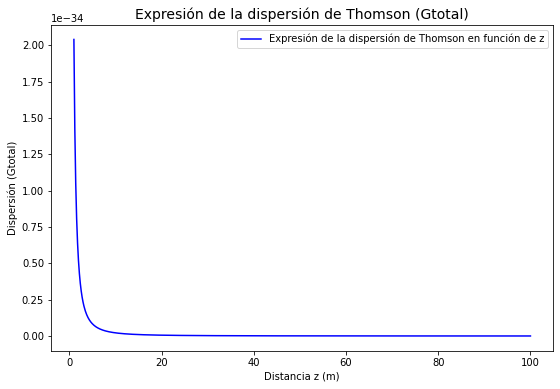

In [59]:
# Gráfico de expresión de la dispersión de Thomson (Gtotal).

x = 215 # Rsol
z = 100 # Rsol
ini_z = 1 # Rsol
incr_z = abs(z - ini_z) / 1000 # Rsol 
epsilon = radians(15)
valores_z = np.arange(ini_z, z + incr_z, incr_z)

pyplot.figure(figsize=(9, 6))
pyplot.title("Expresión de la dispersión de Thomson (Gtotal)", fontsize=14)
pyplot.xlabel("Distancia z (m)")
pyplot.ylabel("Dispersión (Gtotal)")

valores_dispersion = [Gtotal(faux_omega(x, i, epsilon), U, i) for i in valores_z]
pyplot.plot(valores_z, valores_dispersion, linestyle = '-', color ='b', label = 'Expresión de la dispersión de Thomson en función de z')

#pyplot.xscale("log")
#pyplot.yscale("log")

pyplot.legend()
pyplot.show()

#####Modelo de la densidad electrónica

In [60]:
def Ne(d):
  '''
  Modelo para la expresión electrónica de Crammer et al. (1999) usando el 
  UVCS/WLC del satélite SOHO.

  Inicialmente, en unidades de cm⁻³, se aplica una conversión para obtener
  resultados en m⁻³

  Parámetros
  -----------
  d: distancia del centro de la estrella (S) al punto de dispersión (Q). Es
  necesario introducirla en RSol (en general, radios estelares).

  Devuelve
  -----------
  Valor de la densidad electrónica (m⁻³)
  '''
  # en cm⁻³ --> m⁻³
  return 1E8 * (3.89 * d**-10.5 + 0.00869 * d**-2.57) * 1E6

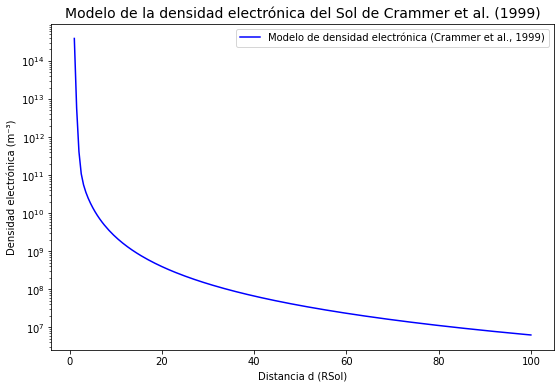

In [61]:
# Gráfico del modelo de Crammer et al. (1999) para la densidad electrónica del
# Sol en función de la distancia d (S-Q).

x = 215 # RSol
d = 100 # RSol
incr_d = 0.5 # RSol 
valores_d = np.arange(1, d + incr_d, incr_d)

pyplot.figure(figsize=(9, 6))
pyplot.title("Modelo de la densidad electrónica del Sol de Crammer et al. (1999)", fontsize=14)
pyplot.xlabel("Distancia d (RSol)")
pyplot.ylabel("Densidad electrónica (m⁻³)")

valores_Ne = [Ne(i) for i in valores_d]
pyplot.plot(valores_d, valores_Ne, linestyle = '-', color ='b', label = 'Modelo de densidad electrónica (Crammer et al., 1999)')

pyplot.yscale("log")

pyplot.legend()
pyplot.show()


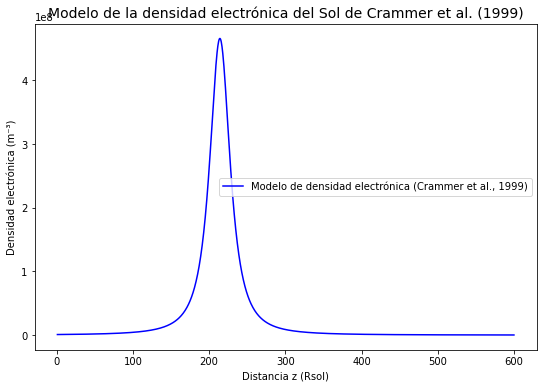

In [62]:
# Gráfico del modelo de Crammer et al. (1999) para la densidad electrónica del
# Sol en función de la distancia z (O-Q).

x = 215 # Rsol
z = 600 # Rsol
incr_z = 0.5 # Rsol 
valores_z = np.arange(1, z + incr_z, incr_z)

pyplot.figure(figsize=(9, 6))
pyplot.title("Modelo de la densidad electrónica del Sol de Crammer et al. (1999)", fontsize=14)
pyplot.xlabel("Distancia z (Rsol)")
pyplot.ylabel("Densidad electrónica (m⁻³)")

valores_Ne = [Ne(faux_d(x, i, radians(5))) for i in valores_z]
pyplot.plot(valores_z, valores_Ne, linestyle = '-', color ='b', label = 'Modelo de densidad electrónica (Crammer et al., 1999)')

#pyplot.yscale("log")

pyplot.legend()
pyplot.show()

#####**Funciones de integración numérica**
Respecto de z, en Rsol, y respecto del ángulo phi (O-S-Q).

In [71]:
def f_Irec_z(x, epsilon, z, u, r = RSOL):
  '''
  Función de la intensidad recibida por la dispersión de Thomson en un punto 
  z_i de la línea de visión.

  Parámetros
  ------------
  x: distancia del observador (O) al centro de la estrella (S).
  epsilon: ángulo de la elongación, S-Q-O, en radianes (rad).
  z: distancia del observador (O) al punto de dispersión (Q).
  r: radio de la estrella. Asigna r = RSOL por defecto, para trabajar en 
  unidades SI. Si r = 1, se entiende que se trabaja en el radio de la estrella.

  Devuelve
  ------------
  El valor de la dispersión de Thomson recibida para un z_i dado.
  '''

  return Ne(faux_d(x, z, epsilon) / r) * Gtotal(faux_omega(x, z, epsilon, r), u)

def Irec_z(x, epsilon, ini_z, fin_z, incr_z, u, r = RSOL):
  '''
  Integración numérica de la dispersión de Thomson recibida a lo largo de toda
  la línea de visión (integración sobre la variable z).

  Parámetros
  ------------
  x: distancia del observador (O) al centro de la estrella (S).
  epsilon: ángulo de la elongación, S-Q-O, en radianes (rad).
  z: distancia del observador (O) al punto de dispersión (Q). Límite superior de
  la integración.
  incr_z: incremento de z para el cálculo de la integral numérica.
  r: radio de la estrella. Asigna r = RSOL por defecto, para trabajar en 
  unidades SI. Si r = 1, se entiende que se trabaja en el radio de la estrella.

  Devuelve
  ------------
  El valor de la dispersión de Thomson recibida para un z_i dado.
  '''

  pasos_z = np.arange(ini_z, fin_z + incr_z, incr_z)
  valorIrec = 0
  for i in pasos_z:
    valorIrec += abs(f_Irec_z(x, epsilon, i + 1, u, r) - f_Irec_z(x, epsilon, i, u, r)) * incr_z
  return valorIrec

def f_Irec_PHI(x, epsilon, phi, u, r = RSOL):
  '''
  Función de la intensidad recibida por la dispersión de Thomson para un ángulo
  dado phi_i.

  Parámetros
  ------------
  x: distancia del observador (O) al centro de la estrella (S).
  epsilon: ángulo de la elongación, S-Q-O, en radianes (rad).
  phi: ángulo O-S-Q, en radianes (rad).
  r: radio de la estrella. Asigna r = RSOL por defecto, para trabajar en 
  unidades SI. Si r = 1, se entiende que se trabaja en el radio de la estrella.

  Devuelve
  ------------
  El valor de la dispersión de Thomson recibida para un ángulo phi_i dado.
  '''
  valor_contribucion_fIrec = 0
  return valor_contribucion_fIrec 

def Irec_PHI(x, epsilon, phi, incr_phi, u, r = RSOL):
  '''
  Integración numérica de la dispersión de Thomson recibida a lo largo de toda
  la línea de visión (integración sobre la variable phi).

  Parámetros
  ------------
  x: distancia del observador (O) al centro de la estrella (S).
  epsilon: ángulo de la elongación, S-Q-O, en radianes (rad).
  phi: ángulo O-S-Q, en radianes (rad). Límite superior de la integración.
  phi_z: incremento de phi para el cálculo de la integral numérica.
  r: radio de la estrella. Asigna r = RSOL por defecto, para trabajar en 
  unidades SI. Si r = 1, se entiende que se trabaja en el radio de la estrella.

  Devuelve
  ------------
  El valor de la dispersión de Thomson recibida para un z_i dado.
  '''

  # Integración numérica de la función intensidad recibida a lo largo de la línea
  # de visión, mediante incrementos de z.
  pasos_phi = np.arange(0, phi + incr_phi, incr_phi)
  valorIrec = 0
  for i in pasos_phi:
      valorIrec += abs(f_Irec_PHI(x, epsilon, i + 1, u, r) - f_Irec_PHI(x, epsilon, i, u, r)) * incr_phi
  return valorIrec

####Gráficos de integración numérica

#####Gráfico de la **integración numérica** de la línea de visión sobre la **distancia z** (O-Q)

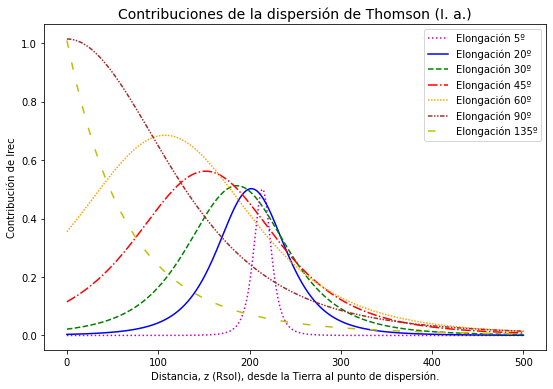

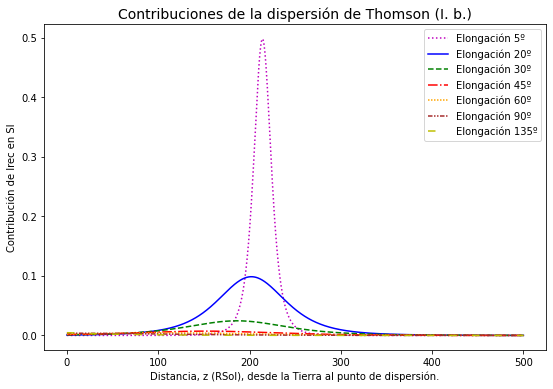

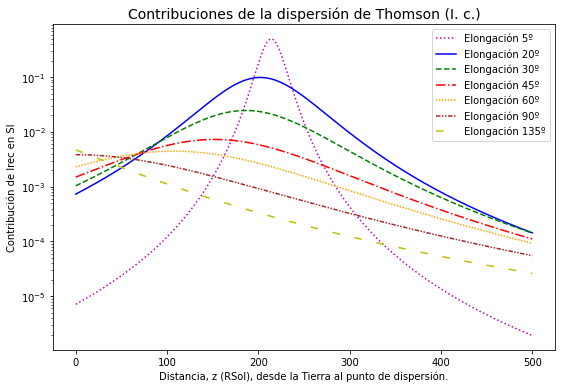

In [74]:
# Gráfico integración numérica de Irec a 2 UA (430 RSol) de distancia, z, 
# desde el observador, O, al punto de dispersión, Q.

## Gráfico sin escala logarítmica (en radios solares).

x = X # Rsol
ini_z = 0 # Rsol
fin_z = 500 # Rsol
incr_z = 0.5 # Rsol 
valores_z = np.arange(ini_z, fin_z + incr_z, incr_z)

pyplot.figure(figsize=(9, 6))
pyplot.title("Contribuciones de la dispersión de Thomson (I. a.)", fontsize=14)
pyplot.xlabel("Distancia, z (Rsol), desde la Tierra al punto de dispersión.")
pyplot.ylabel("Contribución de Irec")

for j in range(0, len(epsilons)):
  # Calcula los valores de intensidad recibida en función de z para una elongación fija.
  valorIrec =  Irec_z(x, epsilons[j], ini_z, fin_z, incr_z, U, 1)
  valores_f_Irec = [f_Irec_z(x, epsilons[j], i, U, 1) / valorIrec for i in valores_z]
  # Representa los valores de las contribuciones.
  pyplot.plot(valores_z, valores_f_Irec, linestyle = estilos[j], color = colores[j], label = etiquetas[j])

pyplot.legend()
pyplot.show()


## Gráficos en unidades SI:

x = X * RSOL # m
ini_z = 0 * RSOL # m
fin_z = 500 * RSOL # m
incr_z = 0.5 * RSOL # m 
valores_z = np.arange(0, z + incrZ, incrZ)

### Gráfico sin escala logarítmica (en metros).

pyplot.figure(figsize=(9, 6))
pyplot.title("Contribuciones de la dispersión de Thomson (I. b.)", fontsize=14)
pyplot.xlabel("Distancia, z (RSol), desde la Tierra al punto de dispersión.")
pyplot.ylabel("Contribución de Irec en SI")

for j in range(0, len(epsilons)):
  # Calcula los valores de intensidad recibida en función de z para una elongación fija.
  valorIrec =  Irec_z(x, epsilons[j], ini_z, fin_z, incr_z, U)
  valores_f_Irec = [f_Irec_z(x, epsilons[j], i, U) / valorIrec for i in valores_z]
  # Representa los valores de las contribuciones.
  pyplot.plot(valores_z / RSOL, valores_f_Irec, linestyle = estilos[j], color = colores[j], label = etiquetas[j])

pyplot.legend()
pyplot.show()

### Gráfico con escala logarítmica (en metros)

pyplot.figure(figsize=(9, 6))
pyplot.title("Contribuciones de la dispersión de Thomson (I. c.)", fontsize=14)
pyplot.xlabel("Distancia, z (RSol), desde la Tierra al punto de dispersión.")
pyplot.ylabel("Contribución de Irec en SI")

for j in range(0, len(epsilons)):
  # Calcula los valores de intensidad recibida en función de z para una elongación fija.
  valorIrec =  Irec_z(x, epsilons[j], ini_z, fin_z, incr_z, U)
  valores_f_Irec = [f_Irec_z(x, epsilons[j], i, U) / valorIrec for i in valores_z]
  # Representa los valores de las contribuciones.
  pyplot.plot(valores_z / RSOL, valores_f_Irec, linestyle = estilos[j], color = colores[j], label = etiquetas[j])

pyplot.yscale("log")

pyplot.legend()
pyplot.show()

#####Gráfico de la **integración numérica** de la línea de visión sobre el **ángulo phi** (O-S-Q)

In [65]:
"""# Gráfico integración numérica de Irec a 2 UA (430 RSol) de distancia, z, 
# desde el observador, O, al punto de dispersión, Q.

PHI = radians(170)
incrPHI = radians(1)
valores_PHI = np.arange(0, PHI + incrPHI, incrPHI)

## Gráfico sin escala logarítmica (en radios solares).

pyplot.figure(figsize=(9, 6))
pyplot.title("Contribuciones de la dispersión de Thomson (II. a.)", fontsize=14)
pyplot.xlabel("Ángulo phi, O-S-Q, (rad)")
pyplot.ylabel("Contribución de Irec")

x = 215 # Rsol

for j in range(0, len(epsilons)):
  # Calcula los valores de intensidad recibida en función de z para una elongación fija.
  valorIrec =  Irec_PHI(x, epsilons[j], PHI, incrPHI, 1)
  valores_f_Irec = [f_Irec_PHI(x, epsilons[j], i, 1) / valorIrec for i in valores_PHI]
  # Representa los valores de omega.
  pyplot.plot(valores_PHI, valores_f_Irec, linestyle = estilos[j], color = colores[j], label = etiquetas[j])

pyplot.ylim(0.001, 1)

pyplot.legend()
pyplot.show()

## Gráficos en unidades SI:

x = 215 * RSOL # m

### Gráfico sin escala logarítmica (en metros)

pyplot.figure(figsize=(9, 6))
pyplot.title("Contribuciones de la dispersión de Thomson (II. b.)", fontsize=14)
pyplot.xlabel("Ángulo phi, O-S-Q, (rad)")
pyplot.ylabel("Contribución de Irec en SI")

for j in range(0, len(epsilons)):
  # Calcula los valores de intensidad recibida en función de z para una elongación fija.
  valorIrec =  Irec_PHI(x, epsilons[j], PHI, incrPHI)
  valores_f_Irec = [f_Irec_PHI(x, epsilons[j], i) / valorIrec for i in valores_PHI]
  # Representa los valores de omega.
  pyplot.plot(valores_PHI, valores_f_Irec, linestyle = estilos[j], color = colores[j], label = etiquetas[j])

#pyplot.ylim(0.001, 1)

pyplot.legend()
pyplot.show()

### Gráfico con escala logarítmica (en metros)

pyplot.figure(figsize=(9, 6))
pyplot.title("Contribuciones de la dispersión de Thomson (II. c.)", fontsize=14)
pyplot.xlabel("Ángulo phi, O-S-Q, (rad).")
pyplot.ylabel("Contribución de Irec en SI")

for j in range(0, len(epsilons)):
  # Calcula los valores de intensidad recibida en función de z para una elongación fija.
  valorIrec =  Irec_PHI(x, epsilons[j], PHI, incrPHI)
  valores_f_Irec = [f_Irec_PHI(x, epsilons[j], i) / valorIrec for i in valores_PHI]
  # Representa los valores de omega.
  pyplot.plot(valores_PHI, valores_f_Irec, linestyle = estilos[j], color = colores[j], label = etiquetas[j])

#pyplot.ylim(0.001, 1)
pyplot.yscale("log")

pyplot.legend()
pyplot.show()"""



'# Gráfico integración numérica de Irec a 2 UA (430 RSol) de distancia, z, \n# desde el observador, O, al punto de dispersión, Q.\n\nPHI = radians(170)\nincrPHI = radians(1)\nvalores_PHI = np.arange(0, PHI + incrPHI, incrPHI)\n\n## Gráfico sin escala logarítmica (en radios solares).\n\npyplot.figure(figsize=(9, 6))\npyplot.title("Contribuciones de la dispersión de Thomson (II. a.)", fontsize=14)\npyplot.xlabel("Ángulo phi, O-S-Q, (rad)")\npyplot.ylabel("Contribución de Irec")\n\nx = 215 # Rsol\n\nfor j in range(0, len(epsilons)):\n  # Calcula los valores de intensidad recibida en función de z para una elongación fija.\n  valorIrec =  Irec_PHI(x, epsilons[j], PHI, incrPHI, 1)\n  valores_f_Irec = [f_Irec_PHI(x, epsilons[j], i, 1) / valorIrec for i in valores_PHI]\n  # Representa los valores de omega.\n  pyplot.plot(valores_PHI, valores_f_Irec, linestyle = estilos[j], color = colores[j], label = etiquetas[j])\n\npyplot.ylim(0.001, 1)\n\npyplot.legend()\npyplot.show()\n\n## Gráficos en uni

## **4. Modelo del espectro de la K-corona**

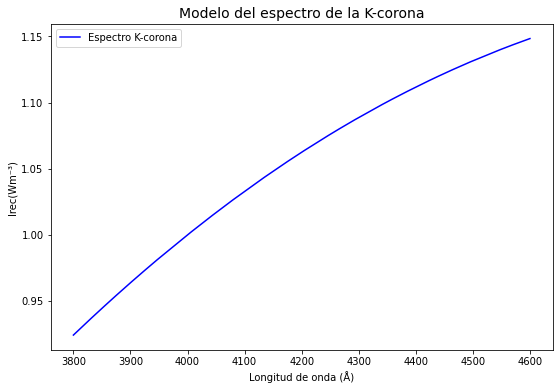

In [90]:
# Gráfico integración numérica de Irec a 2 UA (430 RSol) de distancia, z, 
# desde el observador, O, al punto de dispersión, Q.

pyplot.figure(figsize=(9, 6))
pyplot.title("Modelo del espectro de la K-corona", fontsize=14)
pyplot.xlabel("Longitud de onda (Å)")
pyplot.ylabel("Irec(Wm⁻³)")

x = 215 * RSOL # m
long_onda = 4600E-10 # m
ini_long_onda = 3800E-10 # m
incr_long_onda = abs(long_onda - ini_long_onda) / 5000 # m
ini_z = 0 * RSOL # m
fin_z = 100 * RSOL # m 
incr_z = 0.5 * RSOL # m
epsilon = EPSILON # rad

valores_long_onda = np.arange(ini_long_onda, long_onda + incr_long_onda, incr_long_onda)
valores_Irec = []

U = coef_limb_darkening(4000E-10)
onda_4000 = radiacion_planck(T, 4000E-10) * Irec_z(x, epsilon, ini_z, fin_z, incr_z, U)

# Calcula los valores de intensidad recibida en función de la longitud de onda para una elongación fija.
for i in valores_long_onda:
  U = coef_limb_darkening(i)
  I0 = radiacion_planck(T, i)
  valores_Irec.append(I0 * Irec_z(x, epsilon, ini_z, fin_z, incr_z, U) / onda_4000)
# Representa los valores de omega.
pyplot.plot([i * 1E10 for i in valores_long_onda], valores_Irec, linestyle = '-', color = 'b', label = 'Espectro K-corona')

pyplot.legend()
pyplot.show()

In [76]:
def print_params_state(RSOL_state = 1, SIGMAe_state = 1, ONDA_state = 1, T_state = 1, I0_state = 1, U_state = 1, X_state = 1, EPSILON_state = 1):
  if RSOL_state == 1:
    print("RSOL =", RSOL)
  if SIGMAe_state == 1:
    print("SIGMAe =", SIGMAe) # sección eficaz de un electrón, e, (m²sr⁻¹)
  if ONDA_state == 1:
    print("ONDA =", ONDA) # Longitud de onda en estudio, en metros (5000A)
  if T_state == 1:
    print("T =", T) # K
  if I0_state == 1:
    print("I0 =", I0) # intensidad de la fuente (el Sol)
  if U_state == 1:
    print("U =", U) # coeficiente de limb - darkening.
  if X_state == 1:
    print("X =", X) # RSol, distancia entre la Tierra y el Sol (O-S).
  if EPSILON_state == 1:
    print("EPSILON =", EPSILON)

print_params_state()

RSOL = 696340000
SIGMAe = 7.95e-30
ONDA = 5e-07
T = 5778
I0 = 25762939360512.11
U = 0.8023541158182199
X = 215
EPSILON = 0.17453292519943295


In [78]:
Irec_z(x, epsilon, ini_z, fin_z, incr_z, U)

2.925656820965287e-26